In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

import wrangle as wrangle
import prepare as pr
import explore as ex
%matplotlib inline

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
train, validate, test = wrangle.train_validate_test_split(df)

In [4]:
df = train

In [5]:
df.head()

,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county
42186,2.0,4.0,8.0,2064.0,6037.0,34017722.0,-117851610.0,8025.0,6.037403e+07,34636.0,...,1964.0,284087.0,644943.0,2016.0,360856.0,7528.65,-0.005855,2017-06-01,Central,Los Angeles
17405,2.0,4.0,6.0,1920.0,6059.0,33895330.0,-117879284.0,7632.0,6.059012e+07,24812.0,...,1962.0,100450.0,462860.0,2016.0,362410.0,5301.98,0.062575,2017-03-16,Forced air,Orange
15241,2.0,3.0,6.0,1425.0,6037.0,33871501.0,-118383982.0,2503.0,6.037621e+07,33612.0,...,1973.0,52753.0,86273.0,2016.0,33520.0,1573.60,0.042117,2017-03-08,Central,Los Angeles
22227,1.0,2.0,4.0,838.0,6037.0,34216523.0,-118443856.0,6047.0,6.037120e+07,12447.0,...,1949.0,71787.0,164570.0,2016.0,92783.0,2052.88,-0.009249,2017-03-31,Floor/Wall,Los Angeles
76503,2.0,2.0,6.0,935.0,6059.0,33715500.0,-118050000.0,7313.0,6.059099e+07,25218.0,...,1983.0,87847.0,392467.0,2016.0,304620.0,4561.14,0.005929,2017-09-14,None,Orange


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41713 entries, 42186 to 4990
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   41713 non-null  float64
 1   bedroomcnt                    41713 non-null  float64
 2   buildingqualitytypeid         41713 non-null  float64
 3   calculatedfinishedsquarefeet  41713 non-null  float64
 4   fips                          41713 non-null  float64
 5   latitude                      41713 non-null  float64
 6   longitude                     41713 non-null  float64
 7   lotsizesquarefeet             41713 non-null  float64
 8   rawcensustractandblock        41713 non-null  float64
 9   regionidcity                  41713 non-null  float64
 10  regionidcounty                41713 non-null  float64
 11  regionidzip                   41713 non-null  float64
 12  roomcnt                       41713 non-null  float64
 13

In [7]:
wrangle.summarize(df)



Dataframe head: 
       bathroomcnt  bedroomcnt  buildingqualitytypeid  \
42186          2.0         4.0                    8.0   
17405          2.0         4.0                    6.0   
15241          2.0         3.0                    6.0   

       calculatedfinishedsquarefeet    fips    latitude    longitude  \
42186                        2064.0  6037.0  34017722.0 -117851610.0   
17405                        1920.0  6059.0  33895330.0 -117879284.0   
15241                        1425.0  6037.0  33871501.0 -118383982.0   

       lotsizesquarefeet  rawcensustractandblock  regionidcity  ...  \
42186             8025.0            6.037403e+07       34636.0  ...   
17405             7632.0            6.059012e+07       24812.0  ...   
15241             2503.0            6.037621e+07       33612.0  ...   

       yearbuilt  structuretaxvaluedollarcnt  taxvaluedollarcnt  \
42186     1964.0                    284087.0           644943.0   
17405     1962.0                    100450.0

(-2795.0620000000004, 294454.1]    36093
(294454.1, 588760.2]                4322
(588760.2, 883066.3]                 822
(883066.3, 1177372.4]                291
(1177372.4, 1471678.5]               105
(1471678.5, 1765984.6]                45
(1765984.6, 2060290.7]                18
(2060290.7, 2354596.8]                11
(2354596.8, 2648902.9]                 4
(2648902.9, 2943209.0]                 2
Name: structuretaxvaluedollarcnt, dtype: int64
(-1716.456, 500299.5]     28986
(500299.5, 997345.0]       9470
(997345.0, 1494390.5]      1846
(1494390.5, 1991436.0]      709
(1991436.0, 2488481.5]      301
(2488481.5, 2985527.0]      184
(2985527.0, 3482572.5]      100
(3482572.5, 3979618.0]       56
(3979618.0, 4476663.5]       35
(4476663.5, 4973709.0]       26
Name: taxvaluedollarcnt, dtype: int64
(2013.983, 2014.387]        0
(2014.387, 2014.79]         0
(2014.79, 2015.194]         0
(2015.194, 2015.597]        0
(2015.597, 2016.0]      41713
(2016.0, 2016.403]          0
(2016

In [8]:
cols = []
for col, vals in df.iteritems():
    if df[f'{col}'].dtype != object:
        cols.append(col)

In [9]:
len(cols)

21

<AxesSubplot:title={'center':'distribution of area'}, ylabel='Frequency'>

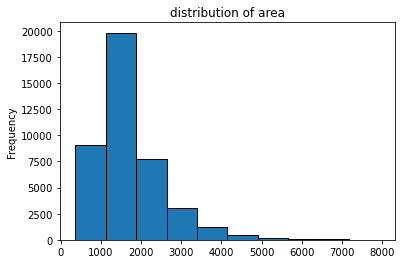

In [17]:
df.calculatedfinishedsquarefeet.plot.hist(title= 'distribution of area', ec='black')

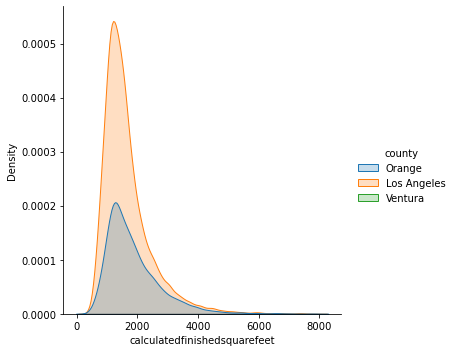

In [34]:
sns.displot(df, x=df[(df.county=='Los Angeles') | (df.county=='Orange')].calculatedfinishedsquarefeet, hue="county", kind='kde',fill=True)

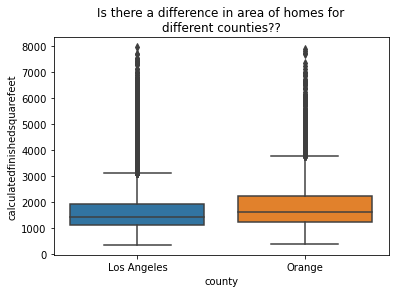

In [27]:
sns.boxplot(df[(df.county=='Los Angeles') | (df.county=='Orange')].county, df.calculatedfinishedsquarefeet)
plt.title("Is there a difference in area of homes for\ndifferent counties??")
plt.show()

> - $H_{0}$: There is no difference in home area between Orange and LA counties.
> - $H_{a}$: There is a difference in home area between Orange and LA counties.

In [28]:
stats.levene(df[df.county=='Los Angeles'].calculatedfinishedsquarefeet,
             df[df.county=='Orange'].calculatedfinishedsquarefeet)

LeveneResult(statistic=166.58445129107497, pvalue=4.948132066430218e-38)

Variance un-equal, non-normal distribution, non-parametric test used

In [33]:
stats.mannwhitneyu(df[df.county=='Los Angeles'].calculatedfinishedsquarefeet,
             df[df.county=='Orange'].calculatedfinishedsquarefeet, alternative = 'two-sided')

MannwhitneyuResult(statistic=134614375.0, pvalue=1.4752850151065156e-110)

> - $H_{a}$ accepted